<a href="https://colab.research.google.com/github/doneela/Underwater-Pipeline-Detection/blob/main/Underwater_pipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!nvidia-smi

Wed Jan 21 02:27:31 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.144                Driver Version: 570.144        CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 5080 ...    Off |   00000000:02:00.0 Off |                  N/A |
| N/A   57C    P4             20W /   80W |    1349MiB /  16303MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import os
HOME = os.getcwd()
print(HOME)

/home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main


In [19]:
!pip install -U ultralytics


from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 5080 Laptop GPU, 15851MiB)
Setup complete ✅ (24 CPUs, 30.7 GB RAM, 1433.6/1832.2 GB disk)


In [8]:
from ultralytics import YOLO

from IPython.display import display, Image

In [17]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="dwIHBDJrSxqzWG9VCKE7")
project = rf.workspace("thesistest-ryea2").project("underwater-pipes-4ng4t-ly50e")
dataset = project.version(1).download("yolov8")


mkdir: cannot create directory ‘/home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main/datasets’: File exists


/home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main/datasets
loading Roboflow workspace...
loading Roboflow project...


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dwIHBDJrSxqzWG9VCKE7")
project = rf.workspace("thesistest-ryea2").project("underwater-pipes-4ng4t-ly50e")
version = project.version(1)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...


In [21]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main
Ultralytics 8.4.6 🚀 Python-3.10.12 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 5080 Laptop GPU, 15851MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main/datasets/underwater-pipes-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, mo

In [25]:
!ls {HOME}/../../runs/detect/train2/

args.yaml			 results.csv	       val_batch0_labels.jpg
BoxF1_curve.png			 results.png	       val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxPR_curve.png			 train_batch14080.jpg  val_batch1_pred.jpg
BoxR_curve.png			 train_batch14081.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch14082.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch1.jpg      weights
labels.jpg			 train_batch2.jpg


/home/lordcruise/Documents/erasmus-thesis


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


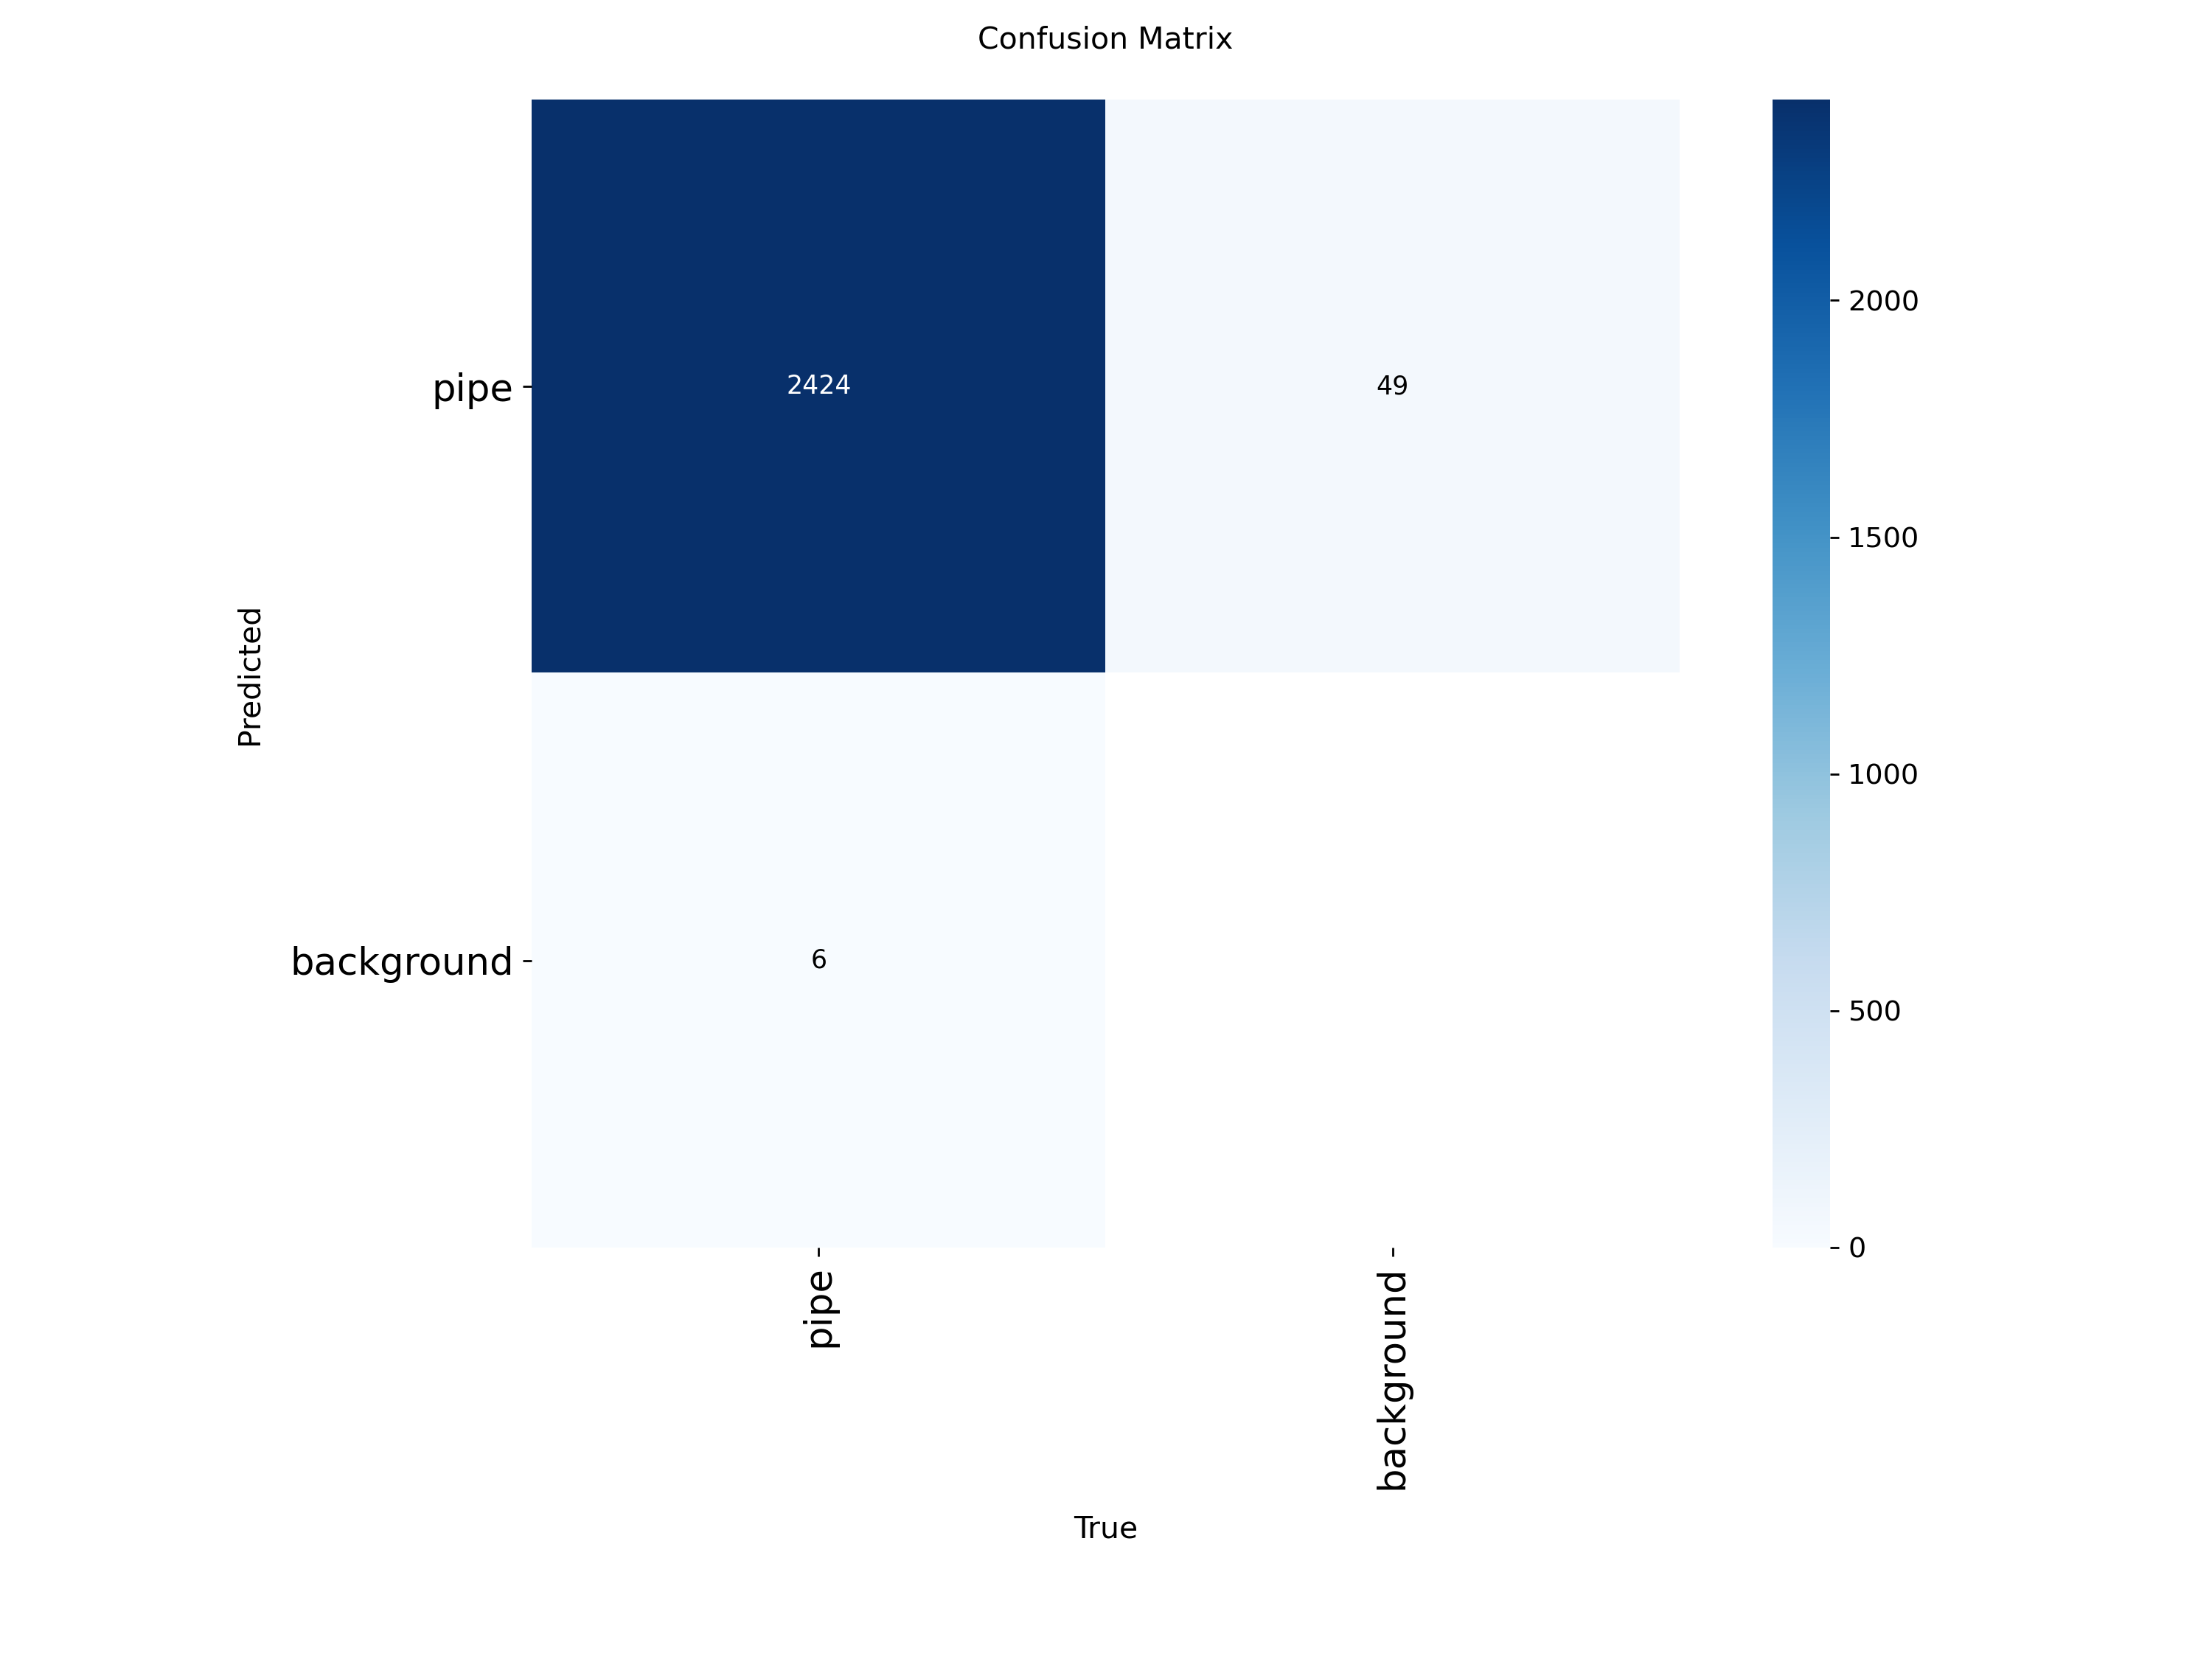

In [27]:
%cd {HOME}/../../
Image(filename=f'{HOME}/../../runs/detect/train2/confusion_matrix.png', width=600)

/home/lordcruise/Documents/erasmus-thesis


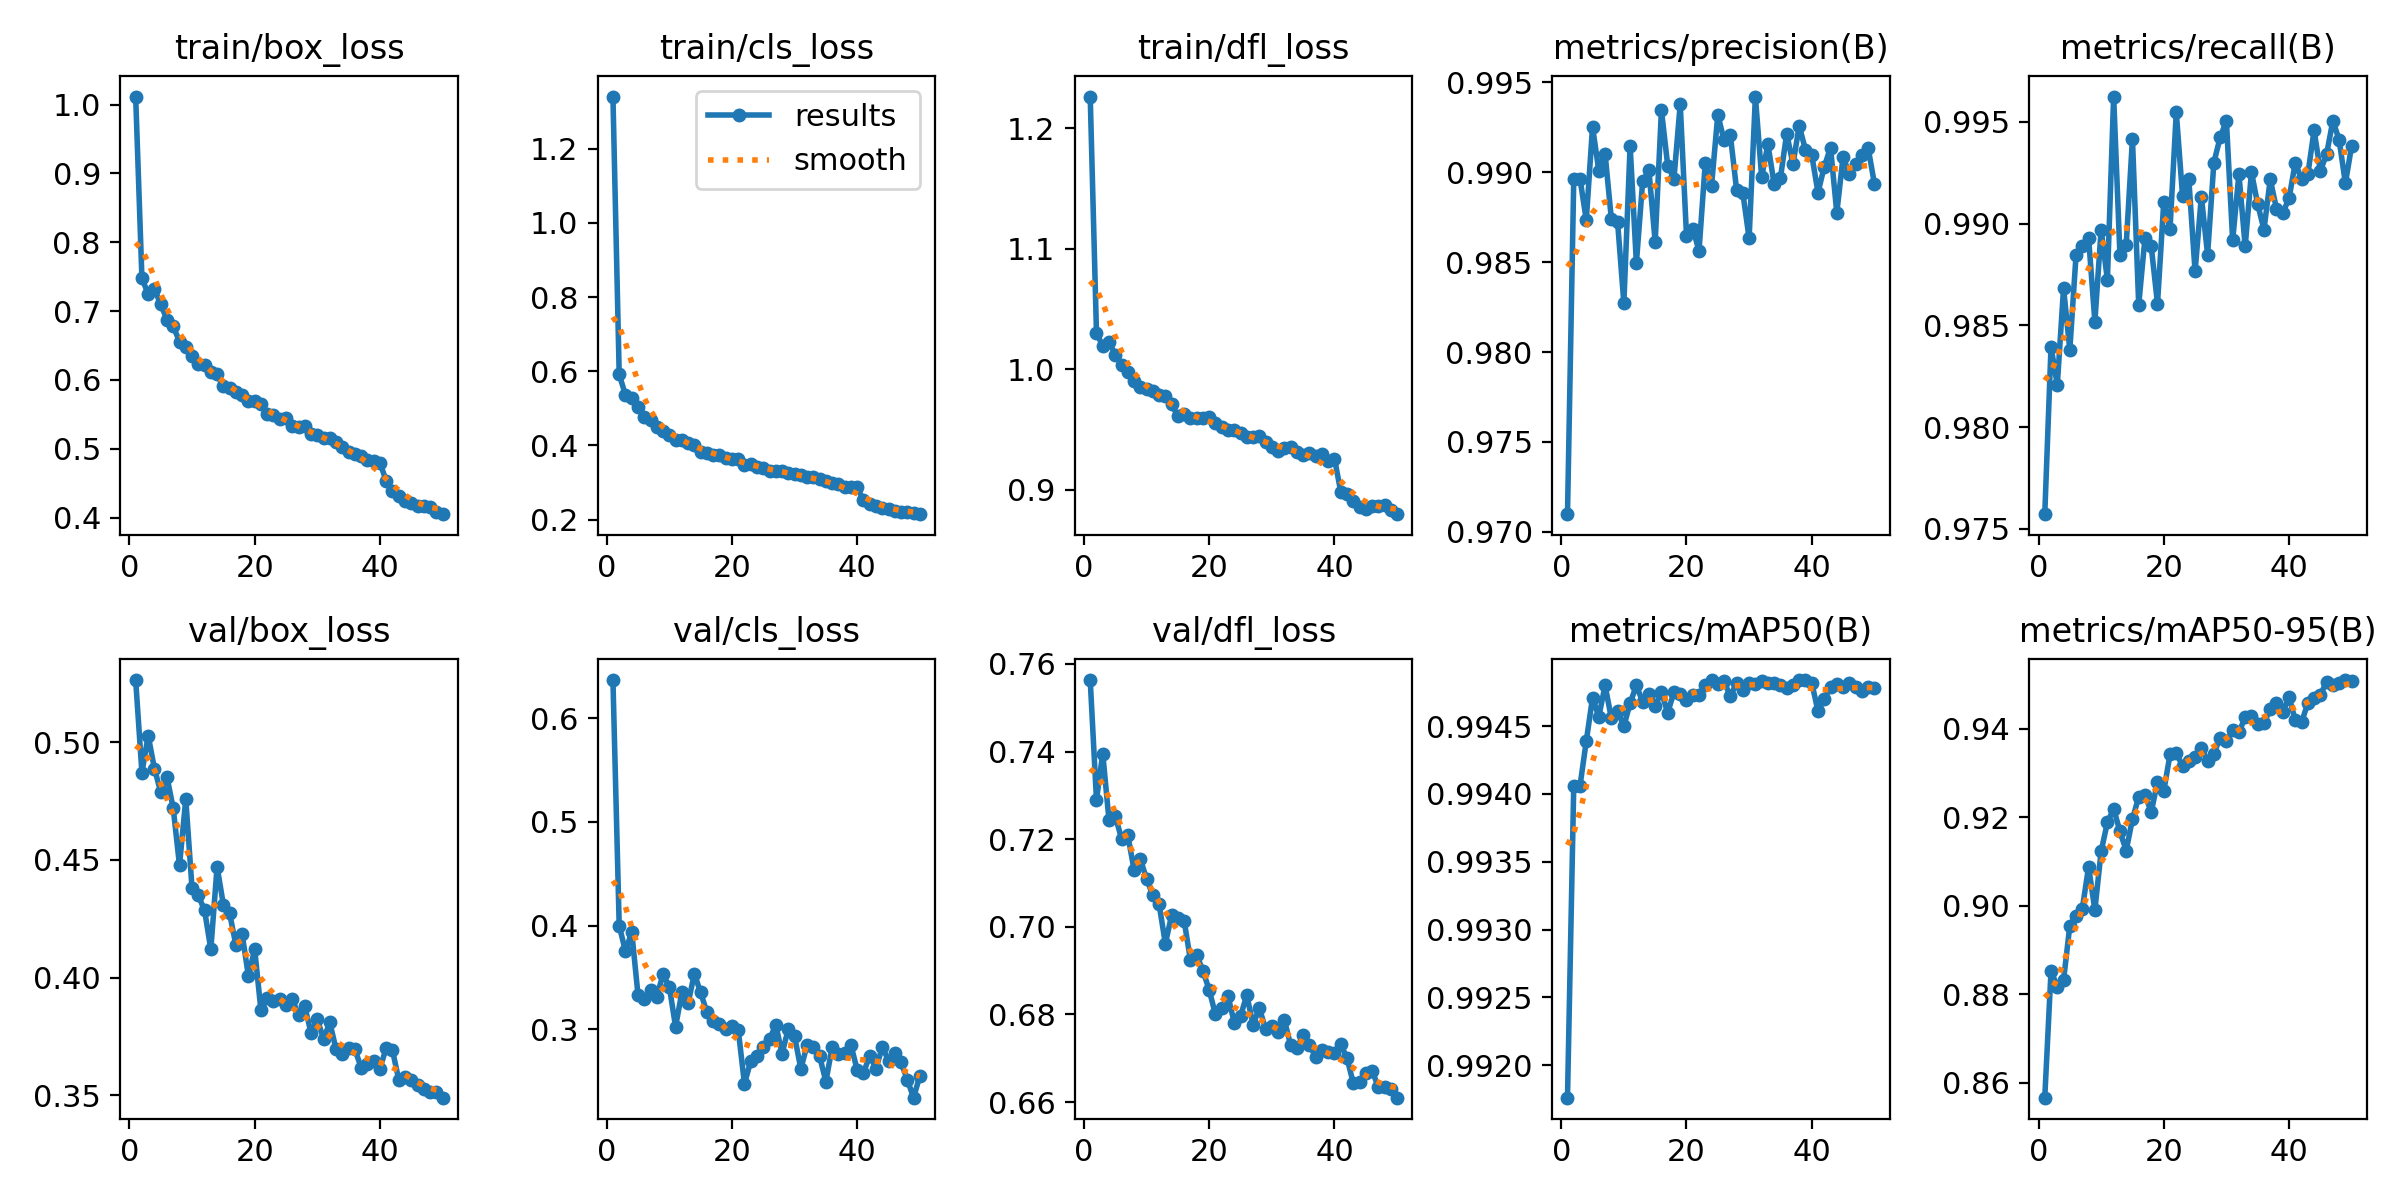

In [29]:
%cd {HOME}/../../
Image(filename=f'{HOME}/../../runs/detect/train2/results.png', width=600)

/home/lordcruise/Documents/erasmus-thesis


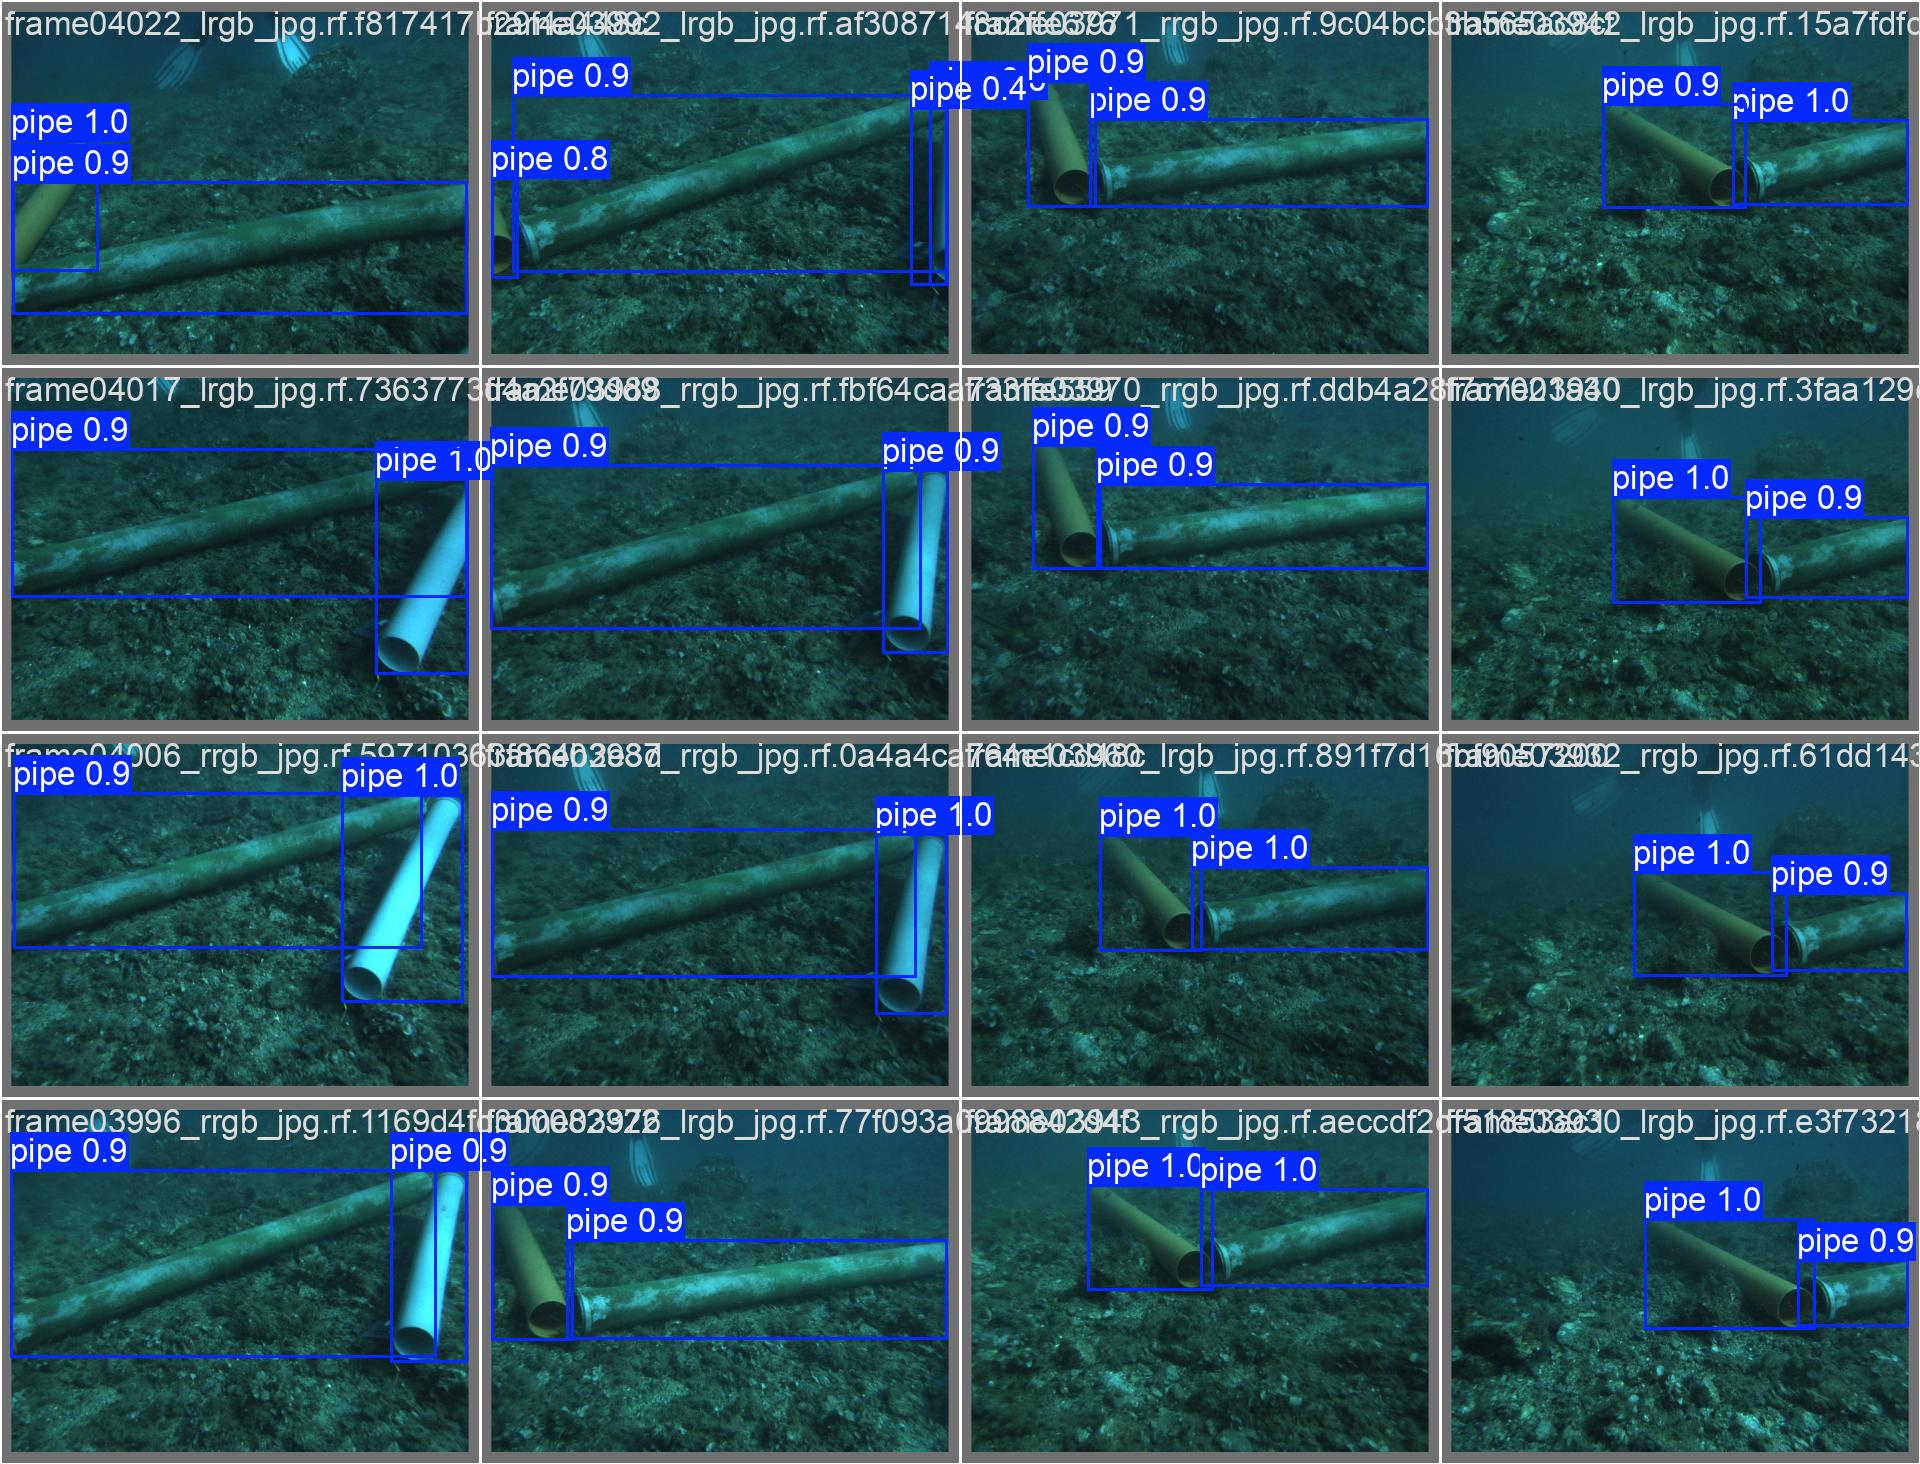

In [30]:
%cd {HOME}/../../
Image(filename=f'{HOME}/../../runs/detect/train2/val_batch0_pred.jpg', width=600)

In [31]:
%cd {HOME}/../../

!yolo task=detect mode=val model={HOME}/../../runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/home/lordcruise/Documents/erasmus-thesis
Ultralytics 8.4.6 🚀 Python-3.10.12 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 5080 Laptop GPU, 15851MiB)
Model summary (fused): 73 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5602.5±732.3 MB/s, size: 108.6 KB)
val: Scanning /home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main/datasets/underwater-pipes-1/valid/labels.cache... 1575 images, 104 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1575/1575 347.7Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 99/99 13.5it/s 7.4s0.1s
                   all       1575       2430      0.991      0.992      0.995      0.951
Speed: 0.4ms preprocess, 2.5ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /home/lordcruise/Documents/erasmus-thesis/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [32]:
%cd {HOME}/../../
!yolo task=detect mode=predict model={HOME}/../../runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/home/lordcruise/Documents/erasmus-thesis


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


Ultralytics 8.4.6 🚀 Python-3.10.12 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 5080 Laptop GPU, 15851MiB)
Model summary (fused): 73 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/779 /home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main/datasets/underwater-pipes-1/test/images/empty_frame00175_rrgb_jpg.rf.1af18f3fb5d292ae85c8e8a0d0e411f9.jpg: 480x640 (no detections), 32.1ms
image 2/779 /home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main/datasets/underwater-pipes-1/test/images/empty_frame00176_rrgb_jpg.rf.13e7461a958a2676c21079efbd02d021.jpg: 480x640 (no detections), 3.0ms
image 3/779 /home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main/datasets/underwater-pipes-1/test/images/empty_frame00183_rrgb_jpg.rf.d64b0d02896787cdc0e1446d4b6f8b70.jpg: 480x640 (no detections), 3.0ms
image 4/779 /home/lordcruise/Documents/erasmus-thesis/ref/Underwater-Pipeline-Detection-main/datasets/underwater-pip

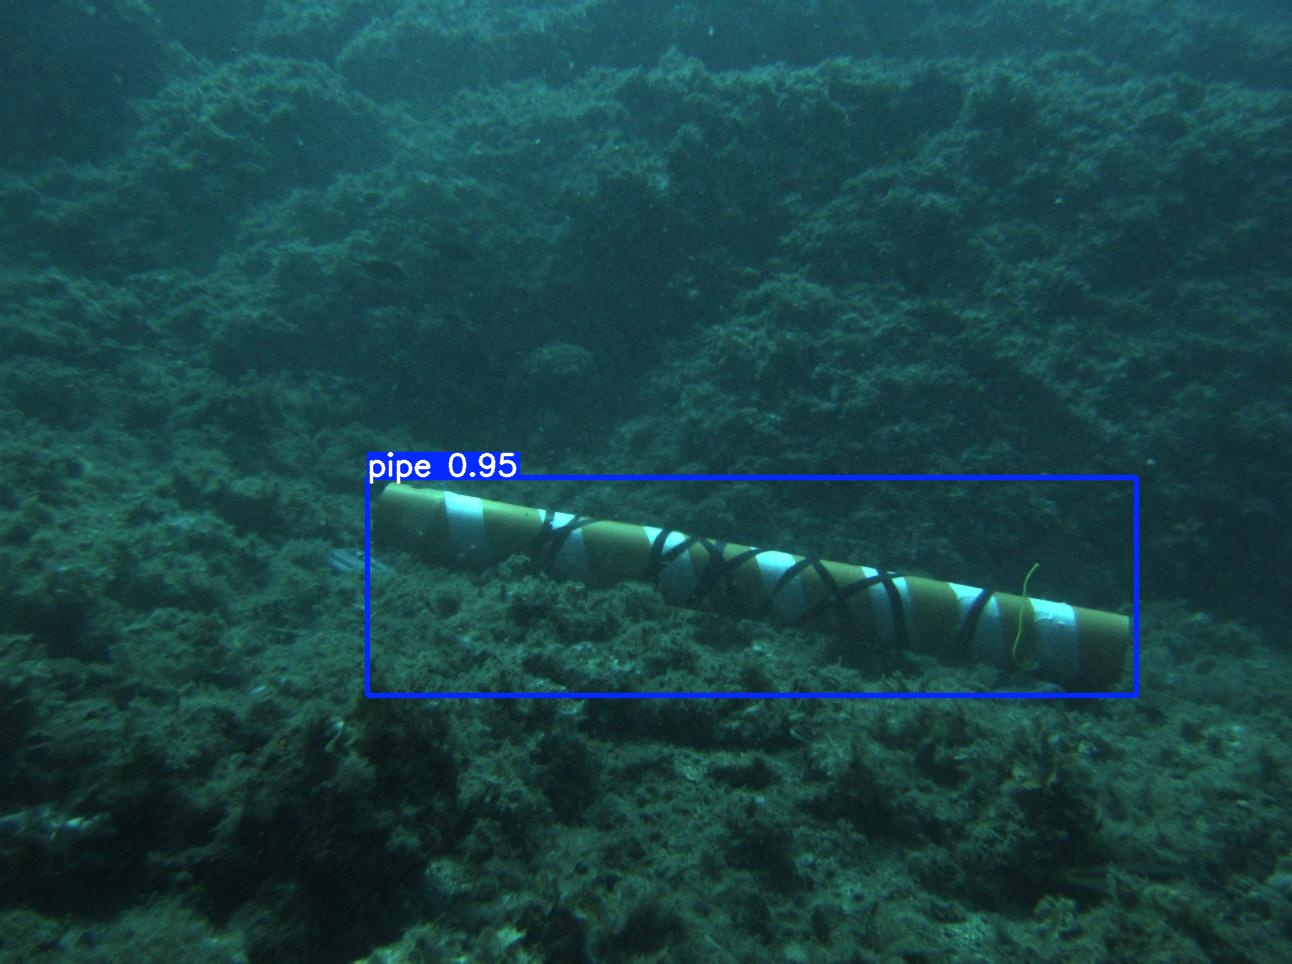

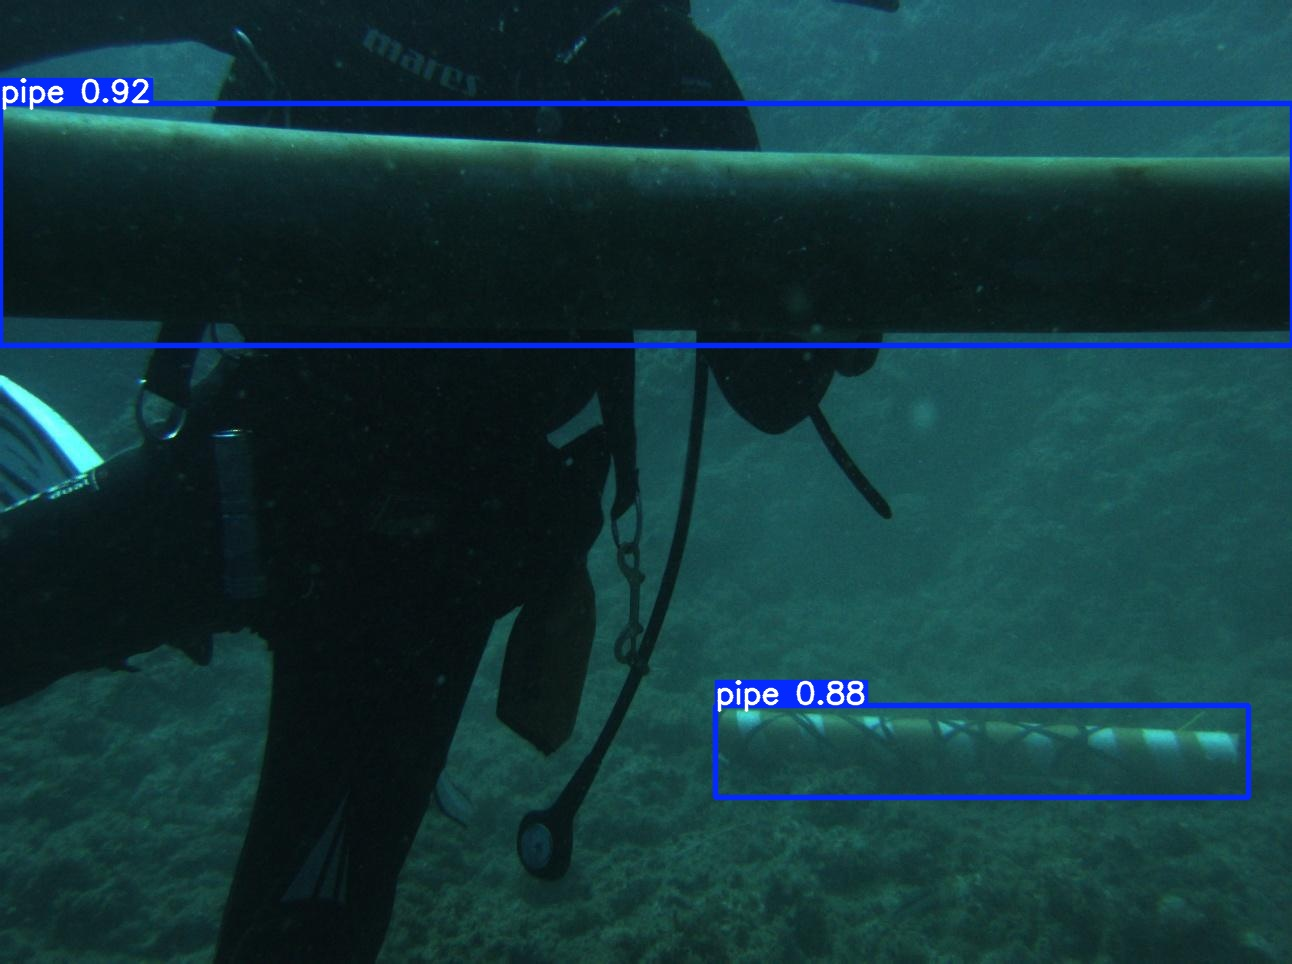

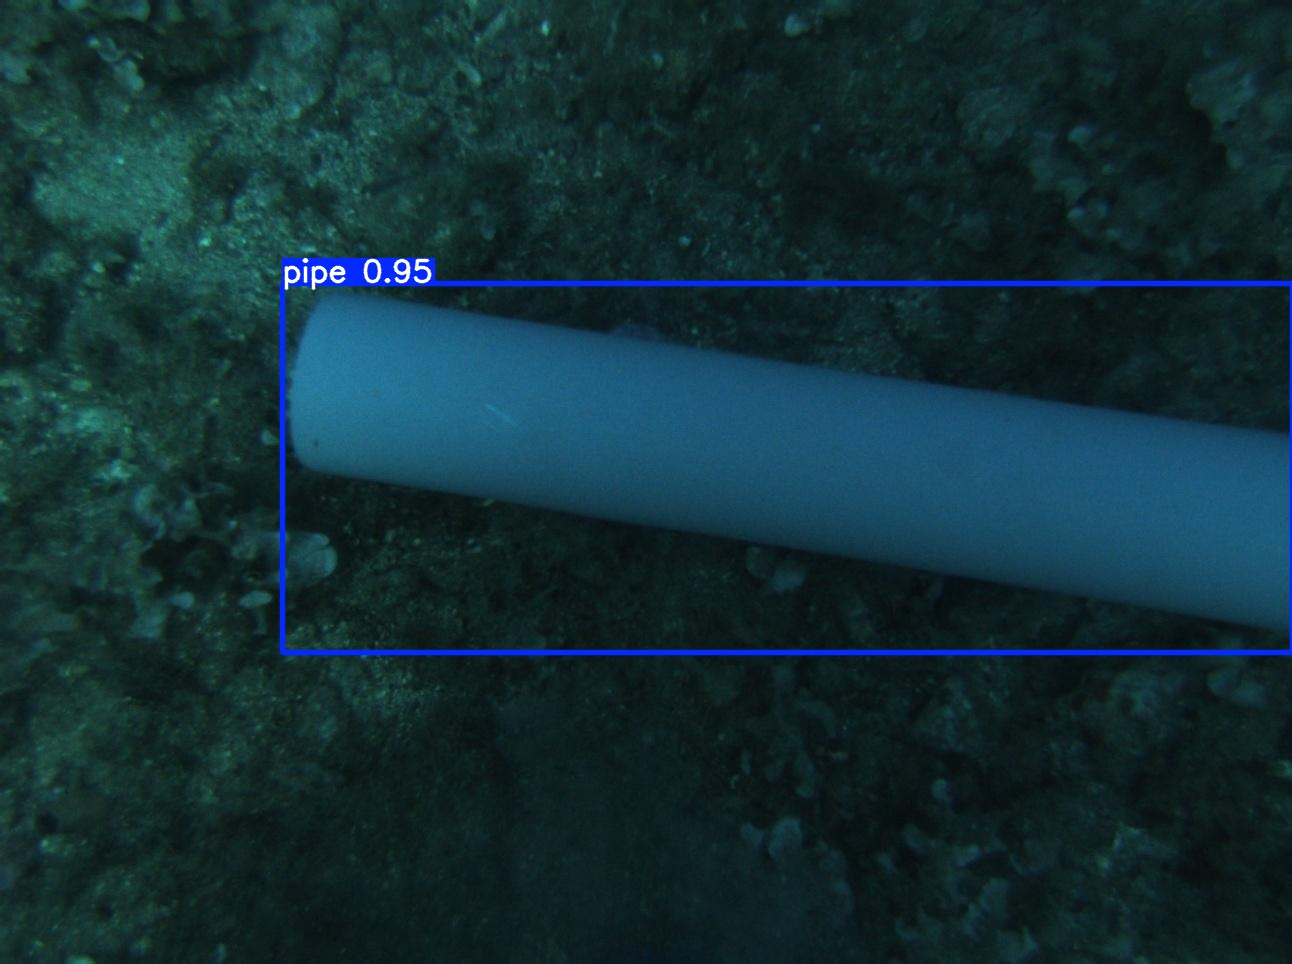

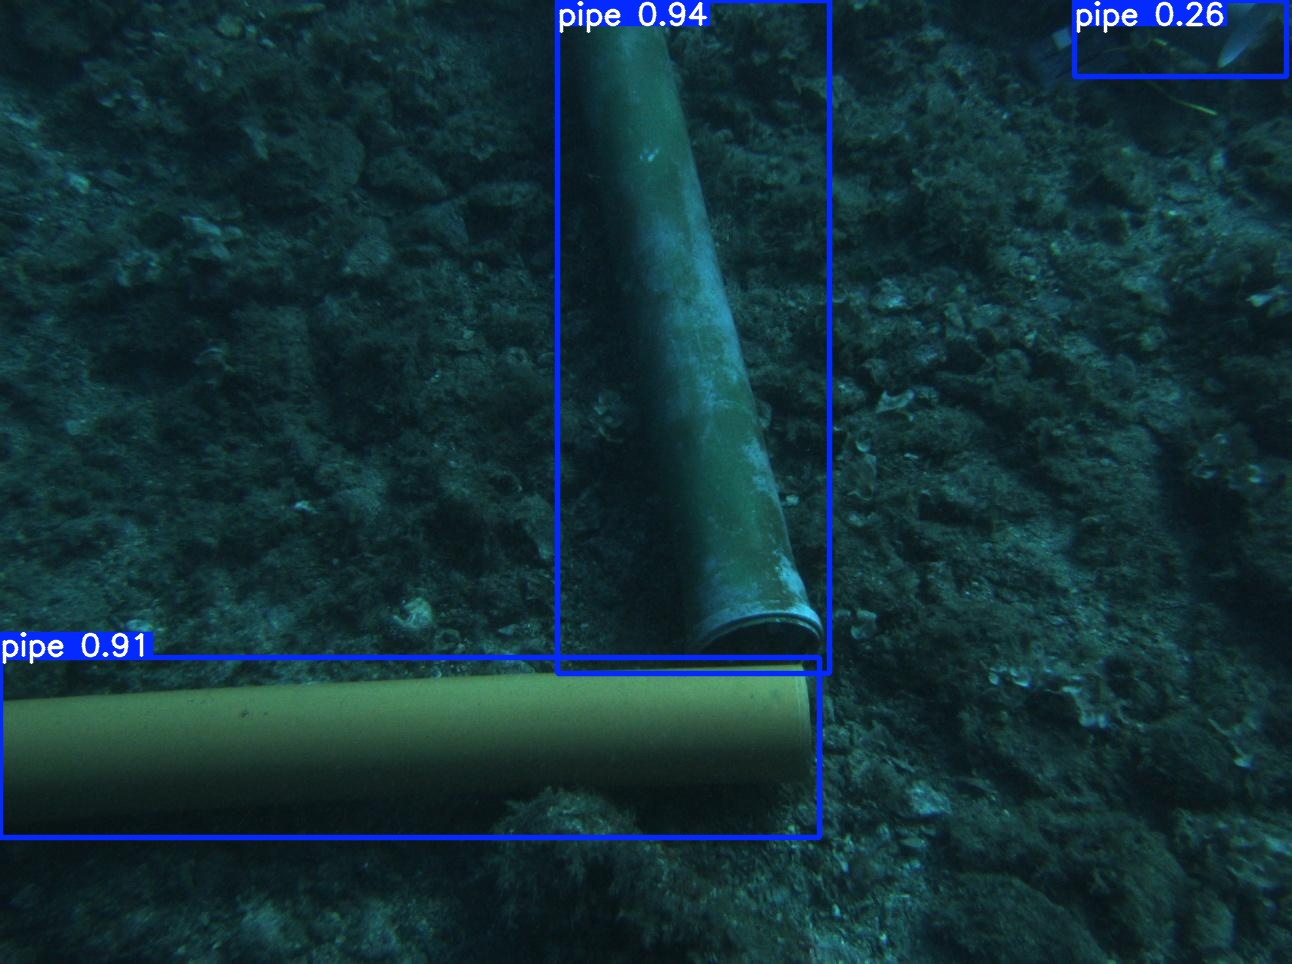

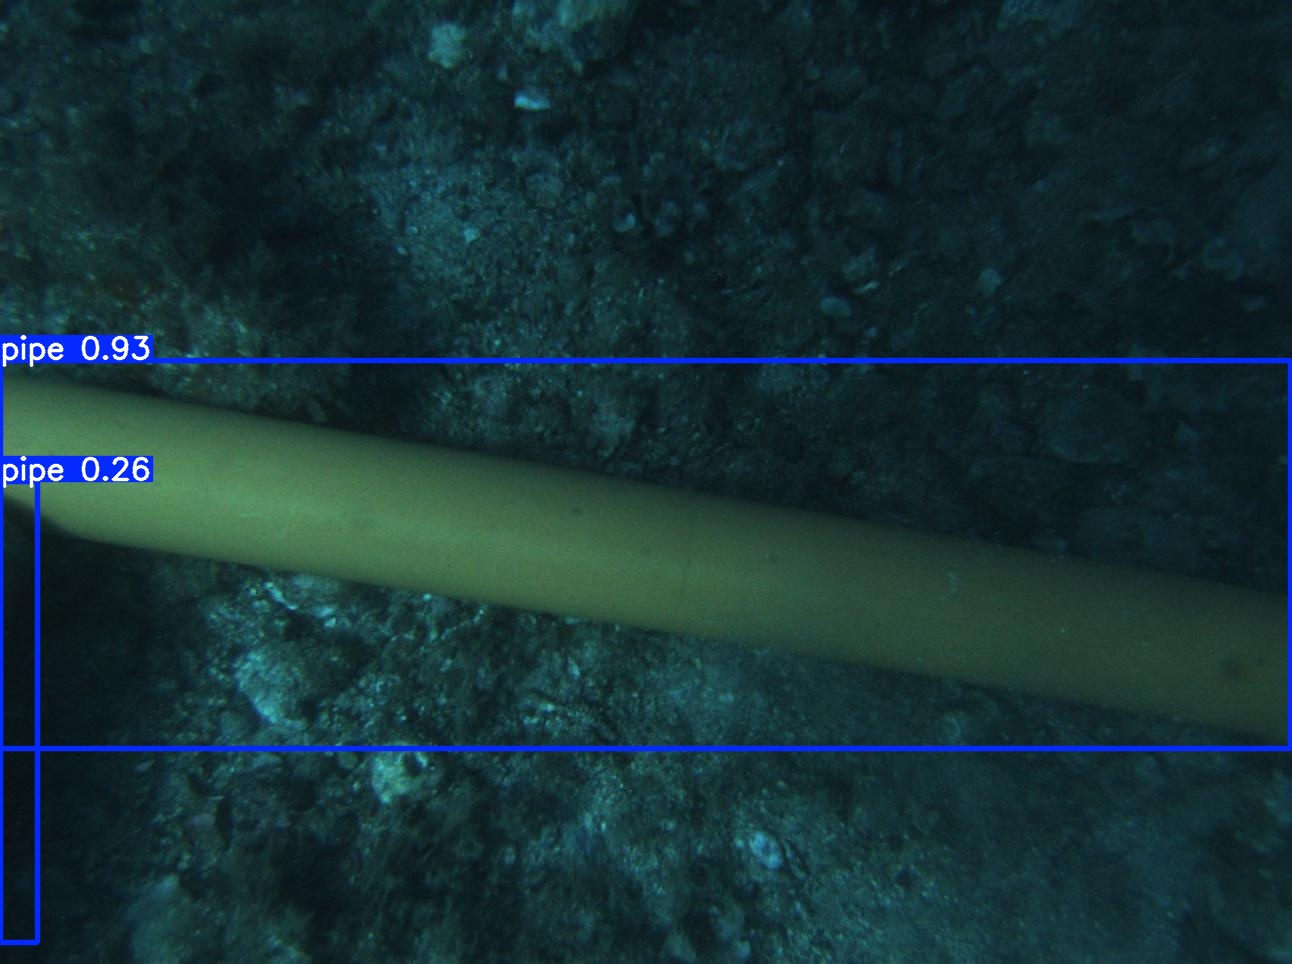

In [33]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/../../runs/detect/predict/*.jpg')[45:50]:
      display(Image(filename=image_path, width=600))
      print("\n")